<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [0]:
#load data form file, split data into training data and test data randomly 

In [0]:
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_tr = pima.sample(n = 200, replace = False)
pima_te = pima.sample(n = 332)

In [79]:
pima_tr.head()#view data of top five

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
390,1,100,66,29,196,32.0,0.444,42,0
211,0,147,85,54,0,42.8,0.375,24,0
197,3,107,62,13,48,22.9,0.678,23,1
199,4,148,60,27,318,30.9,0.150,29,1
44,7,159,64,0,0,27.4,0.294,40,0


In [0]:
#split training data set into positive and negtive group

In [0]:
negtive_sample, positive_sample = pima_tr.groupby('Outcome')
positive_sample, negtive_sample = positive_sample[1], negtive_sample[1]

In [0]:
#function used to get average vector and covariance

In [0]:
def computate_expectation_variance(df):
  x = np.matrix([df['Glucose'].tolist(), df['BMI'].tolist()])
  u = np.matrix([[x[0].mean()],[x[1].mean()]])
  sigma = (x-u) * (x-u).T / df.shape[0]
  return u,sigma

In [0]:
#compute parameters in decision function, f = x^T*S*x + 2c^T*x + F, and the boundary is 0

In [0]:
u_p, sigma_p = computate_expectation_variance(positive_sample)
u_n, sigma_n = computate_expectation_variance(negtive_sample)
p_p, p_n = len(positive_sample)/len(pima_tr), len(negtive_sample)/len(pima_tr)
S = sigma_n.I - sigma_p.I
c = u_p.T*sigma_p.I - u_n.T*sigma_n.I
F = u_n.T*sigma_n.I*u_n - u_p.T*sigma_p.I*u_p + log(np.linalg.det(sigma_n)/np.linalg.det(sigma_p))-2*log(p_n/p_p)

In [0]:
#quadratic decision function

In [0]:
def quadratic_if(x,y):
  x = np.matrix([[x],[y]])
  bias = (x.T*S*x + 2*c*x + F).getA()
  return bias[0][0]

In [0]:
#linear decision function with adjusted parameters
#linear model will be used when the covariance of class1 equals the covariance of class2 
#sigma(co) = P(C1)*sigame + P(C2)*sigma

In [0]:
sigma_co = p_p*sigma_p + p_n*sigma_n
c_l = u_p.T*sigma_co.I - u_n.T*sigma_co.I
F_l = u_n.T*sigma_co.I*u_n - u_p.T*sigma_co.I*u_p + log(1)-2*log(p_n/p_p)

In [0]:
def linear_if(x,y):
  x = np.matrix([[x],[y]])
  bias = (2*c_l*x + F_l).getA()
  return bias[0][0]

In [0]:
#Visualization

<a list of 7 text.Text objects>

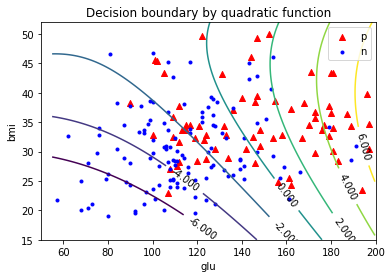

In [86]:
plt.figure('Decision boundary by quadratic function')
plt.title('Decision boundary by quadratic function')
plt.scatter(positive_sample['Glucose'], positive_sample['BMI'], marker='^', color='red', label='p')
plt.scatter(negtive_sample['Glucose'], negtive_sample['BMI'], marker='.', color='blue', label='n')
plt.xlim(50, 200)
plt.ylim(15, 52)
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend()

x = np.arange(55, 200, 0.3625)
y = np.arange(15, 55, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(y)):
  for j in range(len(x)):
    z[i][j] = quadratic_if(x[j],y[i])
contour = plt.contour(x, y, z, [-6,-4,-2,0,2,4,6])
plt.clabel(contour, colors=('k'))

<a list of 7 text.Text objects>

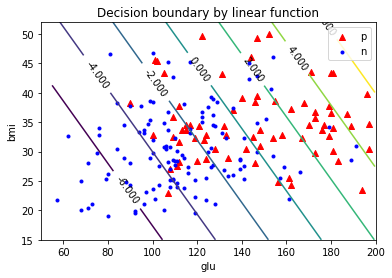

In [87]:
plt.figure('Decision boundary by linear function')
plt.title('Decision boundary by linear function')
plt.scatter(positive_sample['Glucose'], positive_sample['BMI'], marker='^', color='red', label='p')
plt.scatter(negtive_sample['Glucose'], negtive_sample['BMI'], marker='.', color='blue', label='n')
plt.xlim(50, 200)
plt.ylim(15, 52)
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend()

x = np.arange(55, 200, 0.3625)
y = np.arange(15, 55, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(y)):
  for j in range(len(x)):
    z[i][j] = linear_if(x[j],y[i])
contour = plt.contour(x, y, z, [-6,-4,-2,0,2,4,6])
plt.clabel(contour, colors=('k'))

In [0]:
#function evaluating performance in each model

In [0]:
def performace_evaluation(data_te):
  glu = np.array(data_te['Glucose'].tolist())
  bmi = np.array(data_te['BMI'].tolist())
  outcome = np.array(data_te['Outcome'])

  accuracy = [0,0]
  error_rate = [0,0]

  correct = 0
  incorrect = 0
  for i in range(data_te.shape[0]):
    if quadratic_if(glu[i],bmi[i])>0:
      if outcome[i] == 1: correct += 1
      else: incorrect += 1
    if quadratic_if(glu[i],bmi[i])<0:
      if outcome[i] == 0: correct += 1
      else: incorrect += 1
  accuracy[0] = correct / data_te.shape[0]
  error_rate[0] = incorrect / data_te.shape[0]

  correct = 0
  incorrect = 0
  for i in range(data_te.shape[0]):
    if linear_if(glu[i],bmi[i])>0:
      if outcome[i] == 1: correct += 1
      else: incorrect += 1
    if linear_if(glu[i],bmi[i])<0:
      if outcome[i] == 0: correct += 1
      else: incorrect += 1
  accuracy[1] = correct / data_te.shape[0]
  error_rate[1] = incorrect / data_te.shape[0]

  print("ErrorRate:\n quadratic {:.2%}\tlinear {:.2%}".format(error_rate[0], error_rate[1]))
  print("Accuracy:\n quadratic {:.2%}\tlinear {:.2%}".format(accuracy[0], accuracy[1]))

In [89]:
performace_evaluation(pima_tr)

ErrorRate:
 quadratic 23.50%	linear 22.50%
Accuracy:
 quadratic 76.50%	linear 77.50%


In [0]:
#function using library to make ROC (get false positive rate, true positive rate and auc value)

In [0]:
def get_roc_auc(data_te, model=''):
  if model == '':
    print('not understand model type')
    return

  glu = np.array(data_te['Glucose'].tolist())
  bmi = np.array(data_te['BMI'].tolist())

  score = []
  if model == 'quadratic':
    for i in range(data_te.shape[0]):
      score.append(quadratic_if(glu[i],bmi[i]))
  elif model == 'linear':
    for i in range(data_te.shape[0]):
      score.append(linear_if(glu[i],bmi[i]))
  cla = data_te['Outcome']

  fpr, tpr, threshold = roc_curve(cla, score, pos_label=1)
  
  return fpr, tpr, auc(fpr, tpr)

In [0]:
#ROC of quadratic function

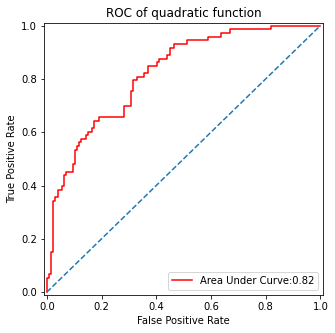

In [91]:
fpr, tpr, roc_auc = get_roc_auc(pima_tr, model='quadratic')

plt.figure('ROC of quadratic function', figsize=(5,5))
plt.title('ROC of quadratic function')
plt.plot(fpr, tpr, color='red', label="Area Under Curve:{:.2}".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [0]:
#ROC of linear function

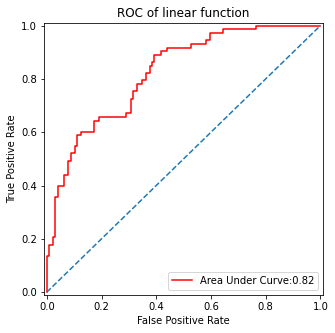

In [92]:
fpr, tpr, roc_auc = get_roc_auc(pima_tr, model='linear')

plt.figure('ROC of linear function', figsize=(5,5))
plt.title('ROC of linear function')
plt.plot(fpr, tpr, color='red', label="Area Under Curve:{:.2}".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()